# KorEDA 활용 Data 증강 

## EDA 원리 설명

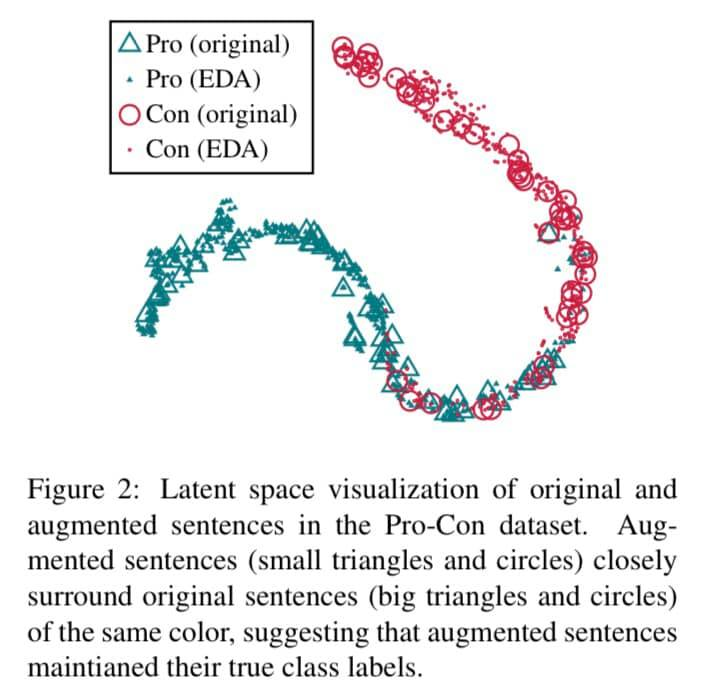
1. SR

특정 단어를 유의어로 교체하는 방식.

2. RI, RD

임의의 단어를 삽입(Insertion)하거나 삭제(Deletion)하는 방식

3. RS

문장 내 임의의 두 단어의 위치를 바꾸는 것.

## KorEDA-Text Augmentation
- 참고 주소: https://github.com/catSirup/KorEDA

In [2]:
# KorEDA 깃 클론
! git clone https://github.com/catSirup/KorEDA.git

Cloning into 'KorEDA'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [3]:
# colab 내 경로 변경
%cd /content/KorEDA

/content/KorEDA


In [4]:
import random
import pickle
import re

wordnet = {}
with open("wordnet.pickle", "rb") as f:
	wordnet = pickle.load(f)

In [5]:
list(wordnet.items())[:10]

[('호흡하', ['호흡하']),
 ('물', ['물', '놈']),
 ('질식하', ['질식하']),
 ('전체', ['전체', '전적', '전부', '총체', '전반']),
 ('한숨짓', ['한숨짓']),
 ('생물', ['생물']),
 ('미생물', ['미생물', '생물']),
 ('헐떡이', ['헐떡이']),
 ('셀', ['셀', '세포']),
 ('하품하', ['하품하'])]

In [6]:
import pandas as pd 

review = pd.read_excel("./data/labeling_total.xlsx", engine='openpyxl')

In [7]:
review

,Review,Label
0,매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱...,NaN
1,처음엔 휴대폰에서 나는 소리가 적응이 되지 않아 머리가 묵직하고 불편한 데 이틀 ...,NaN
2,그리고 가끔 아침에 일어났을 때 머리가 몽롱 한 데 그 땐 아침밥을 먹거나 커피 ...,NaN
3,단점 가끔 휴대폰 소프트웨어가 밤에 자기 마음대로 업데이트 되는데 그때 폰이 꺼졌...,NaN
4,ㅜㅠ 앱에 표시 되는 광고에 대한 평가 란이 있었는데 그런 거 신경 안 쓰고 잠잘...,NaN
...,...,...
14399,무료인 줄 알았는데 결제 해야 한다고 하네요,NaN
14400,만성 비염 때문에 코 골 이로 고생 중인데 괜찮게 쓰구 있습니다,NaN
14401,노트 20 넘어오고부터 작동을 안 하네요,NaN
14402,수면 추 전 모드를 누르고 시작을 누르고 자면 자고 인 나서 멈추면 세션이 너무 ...,NaN


In [11]:
# eda py import 
import eda as eda

eda.get_only_hangul(review['Review'][0])

' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다'

In [12]:
a = eda.synonym_replacement(review['Review'], 1)

In [36]:
'''
for i in range(len(review['Review'])):
  print(eda.get_synonyms(a[i]))
'''

"\nfor i in range(len(review['Review'])):\n  print(eda.get_synonyms(a[i]))\n"

In [14]:
eda.random_swap(review['Review'], 15)[:10]

0     매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱...
1     처음엔 휴대폰에서 나는 소리가 적응이 되지 않아 머리가 묵직하고 불편한 데 이틀 ...
2     그리고 가끔 아침에 일어났을 때 머리가 몽롱 한 데 그 땐 아침밥을 먹거나 커피 ...
3     단점 가끔 휴대폰 소프트웨어가 밤에 자기 마음대로 업데이트 되는데 그때 폰이 꺼졌...
4     ㅜㅠ 앱에 표시 되는 광고에 대한 평가 란이 있었는데 그런 거 신경 안 쓰고 잠잘...
5           엄청 잘 잔 거 같은데 워치에는 3 번이나 깨고 수면 점수 낮게 기록 되네요
6     근데 또 꿈결에 윗 집 진동 알람 땜에 짜증났었는데 앱 소리 였는지 뭐인지 묘 해...
7      뭐 부족한 부분이 있다는 후기가 있어서 한번 경험하고 결제 진행을 선택 하긴 어렵네요
8     개인적인 문 제일 수도 있지만 미라클 나 잇을 사용 할 때마다 휴대폰 진동에 머리...
9     그리고 수면 중지를 해도 주파수 소리가 계속 나오고 알 림 창 알림을 들어가면 이...
Name: Review, dtype: object

In [15]:
review['Review'][:10]

0     매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱...
1     처음엔 휴대폰에서 나는 소리가 적응이 되지 않아 머리가 묵직하고 불편한 데 이틀 ...
2     그리고 가끔 아침에 일어났을 때 머리가 몽롱 한 데 그 땐 아침밥을 먹거나 커피 ...
3     단점 가끔 휴대폰 소프트웨어가 밤에 자기 마음대로 업데이트 되는데 그때 폰이 꺼졌...
4     ㅜㅠ 앱에 표시 되는 광고에 대한 평가 란이 있었는데 그런 거 신경 안 쓰고 잠잘...
5           엄청 잘 잔 거 같은데 워치에는 3 번이나 깨고 수면 점수 낮게 기록 되네요
6     근데 또 꿈결에 윗 집 진동 알람 땜에 짜증났었는데 앱 소리 였는지 뭐인지 묘 해...
7      뭐 부족한 부분이 있다는 후기가 있어서 한번 경험하고 결제 진행을 선택 하긴 어렵네요
8     개인적인 문 제일 수도 있지만 미라클 나 잇을 사용 할 때마다 휴대폰 진동에 머리...
9     그리고 수면 중지를 해도 주파수 소리가 계속 나오고 알 림 창 알림을 들어가면 이...
Name: Review, dtype: object

In [16]:
eda.add_word(eda.random_insertion(review['Review'], 10)[:10])

## EDA 작업 통합 함수

In [19]:
eda.EDA(review['Review'][0],
    alpha_sr=0.5, 
    alpha_ri=0.2, 
    alpha_rs=0.2, 
    p_rd=0.3, 
    num_aug=9)

['매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 이 딱 4시간 반 고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 '매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 반 이 거 켜 수 놨을 때 딱 4시간 반 반 자고 알람을 맞추지 않아도 제때 일어날 수 수 있어서 좋았습니다 면서 깨우지 수 않아도 잘 일어난다며 참 좋아하십니다',
 '매번 9시간 거 놨을 참 깨우지 못하고 수시로 깨는데 이 넘게 켜 자거나 때 좋아하십니다 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 잠들지 않아도 잘 일어난다며 딱 깊게',
 '9시간 넘게 자거나 깊게 깨는데 켜 때 딱 4시간 반 자고 알람을 맞추지 제때 일어날 있어서 좋았습니다 면서 깨우지 잘 일어난다며 참',
 '매번 자거나 깊게 잠들지 수시로 거 때 반 자고 알람을 제때 수 있어서 면서 깨우지 않아도 잘 일어난다며 참',
 '매번 9시간 반 넘게 자거나 깊게 반 잠들지 수 못하고 자 수시로 깨는데 이 거 반 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 이 일어난다며 참 좋아하십니다',
 '매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 반 거 켜 수 놨을 때 딱 4시간 반 자 자고 알람을 맞추지 반 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 수 수 않아도 잘 일어난다며 참 좋아하십니다',
 '매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 시 딱 4시간 반 고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 '수시로 9시간 넘게 면서 않아도 잠들지 못하고 딱 깨는데 이 거 켜 놨을 제때 매번 일어날 반 자고 알람을 맞추지 깊게 때 4시간 수 있어서 좋았습니다 자거나 깨우지 않아도 잘 일어난다며 참 좋아하십니다'

# textattack 라이브러리 활용
https://www.analyticsvidhya.com/blog/2022/02/text-data-augmentation-in-natural-language-processing-with-texattack/

In [ ]:
!pip install textattack

In [21]:
from textattack.augmentation import WordNetAugmenter
text = "start each day with positive thoughts and make your day"
wordnet_aug = WordNetAugmenter()

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [22]:
wordnet_aug.augment(text)

['start each day with positive thoughts and wee-wee your day']

In [23]:
from textattack.augmentation import EmbeddingAugmenter
embed_aug = EmbeddingAugmenter()

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:21<00:00, 22.7MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpljpypvtv.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


In [24]:
embed_aug.augment(text)

['initiating each day with positive thoughts and make your day']

In [25]:
from textattack.augmentation import EasyDataAugmenter
eda_aug = EasyDataAugmenter()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
eda_aug.augment(text)

['start each apiece day with positive thoughts and make your day',
 'with each day start positive thoughts and make your day',
 'each day with positive thoughts and make your day',
 'start each day with positive thoughts and pretend your day']

In [27]:
from textattack.augmentation import CharSwapAugmenter
charswap_aug = CharSwapAugmenter()

In [28]:
charswap_aug.augment(text)

['start each day with positiGe thoughts and make your day']

In [29]:
from textattack.augmentation import CheckListAugmenter
checklist_aug = CheckListAugmenter()

In [30]:
checklist_aug.augment(text)

/usr/local/lib/python3.7/dist-packages/huggingface_hub/file_download.py:591: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/432M [00:00<?, ?B/s]

2022-10-12 02:32:23,507 loading file /root/.flair/models/ner-english/4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4
2022-10-12 02:32:26,443 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


['start each day with positive thoughts and make your day']

In [ ]:
'''
from textattack.augmentation import CLAREAugmenter
clare_aug = CLAREAugmenter()
clare_aug.augment(text)
'''

'\nfrom textattack.augmentation import CLAREAugmenter\nclare_aug = CLAREAugmenter()\nclare_aug.augment(text)\n'

In [31]:
review['Review'][0]

' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다'

In [32]:
from textattack.augmentation import WordNetAugmenter
text = review['Review'][0]
wordnet_aug = WordNetAugmenter()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [33]:
wordnet_aug.augment(text)

[' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다']

In [34]:
from textattack.augmentation import EmbeddingAugmenter
embed_aug = EmbeddingAugmenter()

In [35]:
embed_aug.augment(text)

[' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다']

##  textattack.EasyDataAugmenter

In [ ]:
from textattack.augmentation import EasyDataAugmenter
eda_aug = EasyDataAugmenter(pct_words_to_swap=0.1,  transformations_per_example = 4)
eda_aug.augment(text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 참 딱 4시간 반 자고 알람을 맞추지 않아도 제때 수 일어날 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 때 좋아하십니다',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 놨을 때 딱 4시간 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 일어난다며 참 좋아하십니다']

In [ ]:
eda_aug = EasyDataAugmenter(pct_words_to_swap=0.5,  transformations_per_example = 10)
eda_aug.augment(text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[' 매번 넘게 자거나 깊게 못하고 켜 놨을 때 4시간 자고 않아도 일어날 좋았습니다 깨우지 않아도 잘 참 ',
 ' 매번 9시간 자거나 깊게 수시로 이 켜 놨을 반 알람을 맞추지 일어날 있어서 면서 일어난다며 참 좋아하십니다',
 ' 매번 잠들지 잘 자거나 깊게 9시간 않아도 이 깨는데 수시로 넘게 깨우지 놨을 제때 딱 4시간 반 면서 알람을 맞추지 않아도 때 일어날 수 있어서 참 자고 켜 못하고 거 일어난다며 좋았습니다 좋아하십니다',
 ' 잘 일어난다며 넘게 자거나 깊게 깨우지 있어서 수시로 깨는데 9시간 거 켜 놨을 때 좋아하십니다 이 반 자고 알람을 제때 일어날 맞추지 않아도 수 못하고 좋았습니다 면서 잠들지 않아도 매번 4시간 참 딱',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다']

In [ ]:
eda_aug = EasyDataAugmenter(pct_words_to_swap=0.1,  transformations_per_example = 20)
eda_aug.augment(text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[' 좋았습니다 9시간 수시로 자거나 깊게 잠들지 못하고 넘게 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 매번 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 ' 매번 9시간 넘게 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 깨는데 이 거 켜 놨을 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 ',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 켜 놨을 때 딱 4시간 자고 알람을 맞추지 않아도 제때 일어날 수 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 ' 매번 9시간 넘게 자거나 깊게 맞추지 못하고 수시로 깨는데 이 거 알람을 놨을 때 딱 4시간 반 자고 켜 잠들지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 ' 매번 9시간 넘게 깊게 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 않아도 잘 일어난다며 참 좋아하십니다',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 때 켜 놨을 거 딱 4시간 반 참 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 자고 좋아하십니다',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 놨을 수시로 깨는데 이 거 켜 못하고 때 딱 4시간 자고 반 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면

## CharSwapAugmenter

In [ ]:
from textattack.augmentation import CharSwapAugmenter
charswap_aug = CharSwapAugmenter()
charswap_aug.augment(text)

[' 매번 9시간 넘게 자g나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제Q때 일어날 수 있어서 좋았습G다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다']

## CheckListAugmenter

In [ ]:
from textattack.augmentation import CheckListAugmenter
checklist_aug = CheckListAugmenter()
checklist_aug.augment(text)

[' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다']

# data 증강 정리

In [ ]:
# data load
data = pd.read_excel('./data/labeling_total.xlsx')

In [ ]:
data['Label'].unique()

array([1., 9., 0., 2.])

In [ ]:
data[data['Label'] == 9.0]

,Review,Label
1,처음엔 휴대폰에서 나는 소리가 적응이 되지 않아 머리가 묵직하고 불편한 데 이틀 ...,9.0
4,ㅜㅠ 앱에 표시 되는 광고에 대한 평가 란이 있었는데 그런 거 신경 안 쓰고 잠잘...,9.0
5,엄청 잘 잔 거 같은데 워치에는 3 번이나 깨고 수면 점수 낮게 기록 되네요,9.0
6,근데 또 꿈결에 윗 집 진동 알람 땜에 짜증났었는데 앱 소리 였는지 뭐인지 묘 해...,9.0
11,만약 오류나 버그가 생겨 중지 되더라도 번거롭게 이용권을 다시 드릴 필요도 없고 ...,9.0
...,...,...
7203,"여기와 서 투덜대지 마세요 1 달 무료 체험 이후 연 35,000원 결제 후 프리...",9.0
7206,이 거 미리 결제 하는 거 아니라 체험 시작 누르면 결제 되는 거임,9.0
7229,전 자파 몸에 안 좋은데 머리에 직 빵 어떻게 생각 하세요,9.0
7255,무료 체험 안하고 건너 뛰기 하면 알람 기능만 사용 가능해요,9.0


In [ ]:
data[data['Label'] == 9.0]['Review']

1        처음엔 휴대폰에서 나는 소리가 적응이 되지 않아 머리가 묵직하고 불편한 데 이틀 ...
4        ㅜㅠ 앱에 표시 되는 광고에 대한 평가 란이 있었는데 그런 거 신경 안 쓰고 잠잘...
5              엄청 잘 잔 거 같은데 워치에는 3 번이나 깨고 수면 점수 낮게 기록 되네요
6        근데 또 꿈결에 윗 집 진동 알람 땜에 짜증났었는데 앱 소리 였는지 뭐인지 묘 해...
11       만약 오류나 버그가 생겨 중지 되더라도 번거롭게 이용권을 다시 드릴 필요도 없고 ...
                              ...                        
7203     여기와 서 투덜대지 마세요 1 달 무료 체험 이후 연 35,000원 결제 후 프리...
7206                이 거 미리 결제 하는 거 아니라 체험 시작 누르면 결제 되는 거임
7229                     전 자파 몸에 안 좋은데 머리에 직 빵 어떻게 생각 하세요
7255                    무료 체험 안하고 건너 뛰기 하면 알람 기능만 사용 가능해요
7314                       예전 구매자 프로 모션 코드로 프리미엄 등록 가능하네요
Name: Review, Length: 615, dtype: object

In [ ]:
from textattack.augmentation import EasyDataAugmenter

eda_aug = EasyDataAugmenter(pct_words_to_swap=0.4,  transformations_per_example = 20)
eda_aug.augment(text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[' 참 9시간 반 자거나 깊게 잠들지 맞추지 수시로 깨는데 이 거 켜 놨을 때 딱 일어난다며 넘게 자고 알람을 못하고 않아도 면서 일어날 좋아하십니다 있어서 좋았습니다 제때 4시간 않아도 잘 깨우지 매번 수',
 ' 9시간 넘게 자거나 깊게 못하고 수시로 깨는데 거 켜 놨을 딱 4시간 자고 알람을 맞추지 좋았습니다 면서 않아도 잘 좋아하십니다',
 ' 깊게 9시간 넘게 자거나 매번 않아도 못하고 수시로 딱 이 거 켜 놨을 때 깨는데 4시간 있어서 반 알람을 맞추지 않아도 잘 일어날 수 자고 좋았습니다 깨우지 면서 잠들지 제때 일어난다며 참 좋아하십니다',
 ' 매번 9시간 반 켜 깊게 거 못하고 수시로 깨는데 이 잠들지 일어난다며 놨을 때 일어날 4시간 넘게 자고 알람을 맞추지 않아도 있어서 딱 수 제때 좋았습니다 참 면서 않아도 잘 자거나 깨우지 좋아하십니다',
 ' 매번 9시간 넘게 자거나 깊게 잠들지 못하고 수시로 깨는데 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 않아도 제때 일어날 수 있어서 좋았습니다 면서 깨우지 않아도 잘 일어난다며 참 좋아하십니다',
 ' 매번 9시간 넘게 않아도 깊게 잠들지 못하고 수시로 이 깨는데 거 4시간 놨을 때 딱 켜 알람을 않아도 반 좋았습니다 자고 제때 면서 수 있어서 맞추지 일어날 깨우지 자거나 잘 일어난다며 참 좋아하십니다',
 ' 매번 깊게 잠들지 못하고 깨는데 놨을 때 4시간 자고 알람을 맞추지 제때 수 있어서 좋았습니다 면서 않아도 잘 일어난다며 참 ',
 ' 매번 9시간 넘게 자거나 딱 잠들지 못하고 않아도 깨는데 일어날 거 켜 놨을 있어서 깊게 4시간 반 일어난다며 알람을 맞추지 수시로 제때 이 수 때 참 자고 깨우지 않아도 잘 면서 좋았습니다 좋아하십니다',
 ' 깊게 잠들지 못하고 수시로 이 거 켜 놨을 때 딱 4시간 반 자고 알람을 맞추지 제때 일어날 면서 깨우지 참 ',
 ' 자거나 깊게 잠들지 수시로 깨는데 이 거 켜 놨을 딱 4시간 알람을 일어날 수 있어서 좋았습니다 면서 깨우지 일어

In [ ]:
from textattack.augmentation import EasyDataAugmenter
from tqdm.notebook import tqdm
eda_aug = EasyDataAugmenter(pct_words_to_swap=0.4,  transformations_per_example = 10)

data_dict = {}

rating_list = [2.0, 9.0]

for rating in rating_list:
  data_total = []
  for text in tqdm(data[data['Label'] == rating]['Review']):
    augment_text_list = eda_aug.augment(text)
    for i in range(len(augment_text_list)):
      data_total.append(augment_text_list[i])
  data_total_df = pd.DataFrame(data_total, columns = ['Review'])
  data_total_df['Label'] = rating
  data_dict[str(rating)] = data_total_df

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


  0%|          | 0/1495 [00:00<?, ?it/s]

  0%|          | 0/615 [00:00<?, ?it/s]

In [ ]:
data_dict

{'2.0':                                                  Review  Label
 0      이용권 얼마인가 보려고 진해서 플랜이나 소 한 주시면 해 봤습니다 차라리 요 금제...    2.0
 1               이용권 한 개 진해서 확인 해 요 금제를 플랜이나 플랜으로 해 주시면     2.0
 2      이용권 얼마인가 보려고 한 개 소 진해서 확인 해 봤습니다 차라리 요 금제를 월간...    2.0
 3      해 얼마인가 보려고 개 해 소 진해서 확인 주간 봤습니다 플랜이나 요 금제를 월간...    2.0
 4           이용권 얼마인가 보려고 개 해 봤습니다 차라리 요 플랜이나 주간 해 좋겠습니다    2.0
 ...                                                 ...    ...
 7678                           다 좋은데 후 aid 키 거나 끌 있었으면     2.0
 7679       다 좋은데 알람 설정 후 rest assist 키 거나 끌 수 있었으면 좋겠어요    2.0
 7680                           알람 설정 후 키 거나 수 있었으면 좋겠어요    2.0
 7681         다 좋은데 알람 설정 후 sleep aid 키 거나 끌 수 있었으면 좋겠어요    2.0
 7682         다 좋은데 알람 aid 후 sleep 수 키 거나 있었으면 설정 끌 좋겠어요    2.0
 
 [7683 rows x 2 columns],
 '9.0':                                                  Review  Label
 0      괜찮아 휴대폰에서 나는 소리가 적응이 되지 않아 머리가 집니다 불편한 지나면 끝난...    9.0
 1      처음엔 지나면 데 이틀 적응이 되지 않아 머리가 묵직하고 소리가 나는 불편한 휴대...    9.

In [ ]:
data_dict.keys()

dict_keys(['2.0', '9.0'])

In [ ]:
final_df = pd.concat(data_dict.values())
final_df

,Review,Label
0,이용권 얼마인가 보려고 진해서 플랜이나 소 한 주시면 해 봤습니다 차라리 요 금제...,2.0
1,이용권 한 개 진해서 확인 해 요 금제를 플랜이나 플랜으로 해 주시면,2.0
2,이용권 얼마인가 보려고 한 개 소 진해서 확인 해 봤습니다 차라리 요 금제를 월간...,2.0
3,해 얼마인가 보려고 개 해 소 진해서 확인 주간 봤습니다 플랜이나 요 금제를 월간...,2.0
4,이용권 얼마인가 보려고 개 해 봤습니다 차라리 요 플랜이나 주간 해 좋겠습니다,2.0
...,...,...
3207,프로 구매자 가능하네요 모션 코드로 프리미엄 등록 예전,9.0
3208,예전 구매자 코드로 모션 프로 가능하네요 등록 프리미엄,9.0
3209,예전 프로 코드로 프리미엄 가능하네요,9.0
3210,예전 구매자 프로 모션 코드로 프리미엄 등록 가능하네요,9.0


In [ ]:
final_df.to_csv('./data_augmentation_9_2.csv')